## Pizza Sales Analysis: Operational Efficiency & Revenue Optimization

References:
Dnyanesh Yeole, 'Cheesy Conclusions: Analyzing Pizza Sales', Kaggle, 2024



### Problem Statement

A pizza restaurant has been collecting transactional data for the past year but has not effectively leveraged it to improve business operations. The restaurant seeks data-driven insights to increase sales, optimize operational efficiency, and enhance resource utilization.

#### Key Business Questions:

1. What days and times experience the highest order volumes?
2. How many pizzas are produced during peak periods?
3. Which pizzas are the best and worst performers in terms of sales?
4. What is the average order value, and are there opportunities to increase it?
5. How effectively is seating capacity being utilized given the available resources?

#### Objective

Conduct exploratory data analysis to identify sales patterns, customer preferences, and operational bottlenecks, ultimately providing actionable recommendations to drive revenue growth and improve operational efficiency.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
pizza_df = pd.read_excel(r'C:\Users\abish\Downloads\Data Model - Pizza Sales.xlsx')

#### Dataset Description

This dataset contains comprehensive pizza sales transaction data with 48,621 orders across 12 features, providing insights into customer purchasing patterns, product preferences, and sales performance.

#### Features

##### Order Identifiers

* pizza_id - Unique identifier for each pizza item
* order_id - Unique identifier for each customer order
* pizza_name_id - Standardized identifier for pizza types

##### Transaction Details

* quantity - Number of pizzas ordered per transaction (integer)
* unit_price - Price per individual pizza (USD)
* total_price - Total transaction amount (unit_price × quantity)

##### Temporal Information

* order_date - Date of order placement (YYYY-MM-DD format)
* order_time - Time of order placement (HH:MM:SS format)

##### Product Specifications

* pizza_size - Pizza dimensions: S (Small), M (Medium), L (Large), XL (Extra Large), XXL (Extra Extra Large) (Ordinal Data Type!)
* pizza_category - Pizza style classification: Classic, Veggie, Supreme, Chicken
* pizza_ingredients - Complete list of toppings and ingredients used
* pizza_name - Specific pizza product name/label

In [7]:
pizza_df.sample(10)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
4562,4563,2021,cali_ckn_l,1,2015-02-03,14:25:13,20.75,20.75,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
15780,15781,6927,cali_ckn_l,1,2015-04-26,20:09:13,20.75,20.75,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
9295,9296,4072,ital_veggie_m,1,2015-03-10,13:19:51,16.75,16.75,M,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza
30982,30983,13686,pepperoni_m,1,2015-08-16,17:06:44,12.50,12.50,M,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
36017,36018,15903,ital_veggie_s,1,2015-09-23,15:16:46,12.75,12.75,S,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza
26703,26704,11762,mexicana_m,1,2015-07-16,12:15:21,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
420,421,178,peppr_salami_l,1,2015-01-03,18:15:03,20.75,20.75,L,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
37000,37001,16334,bbq_ckn_m,1,2015-10-02,13:44:29,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
13562,13563,5949,mediterraneo_m,1,2015-04-10,17:56:11,16.00,16.00,M,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",The Mediterranean Pizza
36471,36472,16102,southw_ckn_m,1,2015-09-28,19:14:35,16.75,16.75,M,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza


### Data Type Inferences & Analysis Implications
Some of the inferences we can make right away are:

##### Ordinal Data
* **pizza_size** - Natural ordering from smallest to largest (S < M < L < XL < XXL)
  - Can perform ordered comparisons and trend analysis
  - Useful for analyzing pricing strategies across size tiers
  - Can calculate size distribution and upgrade patterns

##### Categorical Data (Nominal)
* **pizza_category** - No inherent order (Classic, Veggie, Supreme, Chicken)
  - Categories are mutually exclusive
  - Can analyze preference distribution and category performance
  - Useful for inventory and menu optimization

* **pizza_name** & **pizza_name_id** - Unique product identifiers
  - Can identify best/worst sellers
  - Enable product-level performance analysis

##### Numerical Data (Continuous)
* **unit_price** & **total_price** - Monetary values
  - Can calculate revenue metrics, averages, and totals
  - Enable pricing analysis and profitability assessment

##### Numerical Data (Discrete)
* **quantity** - Count data (whole numbers only)
  - Can analyze order size patterns
  - Useful for bulk ordering trends and demand forecasting

##### Temporal Data
* **order_date** & **order_time** - Time-series data
  - Can extract cyclical patterns (day of week, month, hour)
  - Enable seasonality and trend analysis
  - Useful for staffing and inventory planning

##### Text/Multi-valued Data
* **pizza_ingredients** - Comma-separated list
  - Requires parsing for ingredient-level analysis
  - Can identify popular ingredient combinations
  - Useful for supplier negotiations and menu engineering

##### Identifier Data
* **pizza_id** & **order_id** - Unique keys
  - Enable data joining and relationship tracking
  - Can calculate orders per customer, items per order

In [8]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


This looks like it has no missing data for now.
The datatypes also seem appropriately assigned.

In [9]:
pizza_df.duplicated().sum()

0

This shows that the dataset doesn't have any duplicates. We don't have to anaylyze the type of missing data and how to proceed with solving it.

In [10]:
pizza_df.describe()

,order_details_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


#### Takeaway is

* **Dataset Size**: 48,620 pizza orders collected throughout the entire year of 2015

* **Typical Order**: Most customers order 1-2 pizzas per transaction, with an average order value of about $17

* **Price Range**: Pizzas range from $9.75 to $35.95, showing variety in menu options and sizes

* **Order Patterns**: The data spans evenly across all 12 months with consistent daily sales

* **Customer Behavior**: Orders are relatively small and straightforward - mainly individual customers or small groups rather than large parties

Let's check what are the statistics and some trends the sales follow

In [14]:
total_revenue = (pizza_df['total_price']).sum()
print("Total Revenue:", total_revenue)

Total Revenue: 817860.05


In [15]:
avg_order_value = pizza_df.groupby('order_id')['total_price'].sum().mean()
print("Average Order Value:", avg_order_value)

Average Order Value: 38.30726229508196


In [16]:
total_pizzas_sold = pizza_df['quantity'].sum()
print("Total Pizzas Sold:", total_pizzas_sold)

Total Pizzas Sold: 49574


In [17]:
total_orders = len(pizza_df.groupby('order_id').count())
print("Total Orders:", total_orders)

Total Orders: 21350


In [18]:
avg_pizzas_per_order = pizza_df['quantity'].sum() / total_orders
print("Average Pizzas per Order:", avg_pizzas_per_order)

Average Pizzas per Order: 2.321967213114754


The restaurant earned **$817,860** in 2015 from **21,350 orders**, with customers spending an average of **$38 per order**. This shows steady business throughout the year with consistent customer spending.

In total, **49,574 pizzas** were sold, with most orders containing about **2-3 pizzas**. This indicates customers typically order for small groups or families rather than just themselves.

What is the average unit price and revenue of pizza across different categories?


In [19]:
category_analysis = pizza_df.groupby('pizza_category').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_category=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).sort_values(by='revenue_per_category', ascending=False)
print("Average Unit Price and Revenue by Category:\n", category_analysis)

Average Unit Price and Revenue by Category:
                 average_unit_price  revenue_per_category
pizza_category                                          
Classic                  14.797490             220053.10
Supreme                  17.363229             208197.00
Chicken                  17.709408             195919.50
Veggie                   16.612639             193690.45


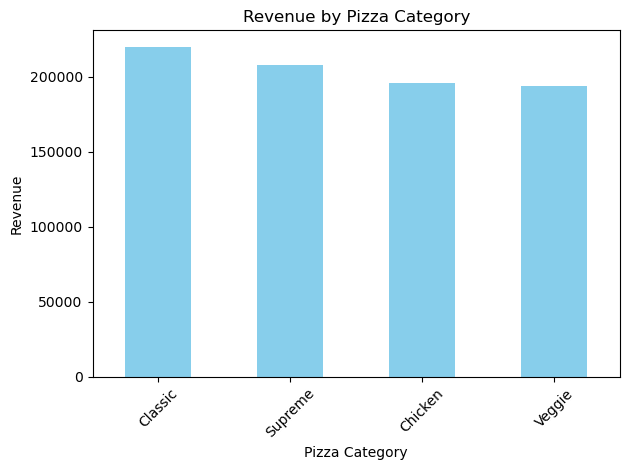

In [20]:
# Revenue by Pizza Category
category_analysis['revenue_per_category'].plot(kind='bar', color='skyblue')
plt.xlabel('Pizza Category')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What is the average unit price and revenue of pizza across different sizes?

In [21]:
size_analysis = pizza_df.groupby('pizza_size').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_size=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).sort_values(by='revenue_per_size', ascending=False)
print("Average Unit Price and Revenue by Size:\n", size_analysis)

Average Unit Price and Revenue by Size:
             average_unit_price  revenue_per_size
pizza_size                                      
L                    19.802553         375318.70
M                    15.951219         249382.25
S                    12.364328         178076.50
XL                   25.500000          14076.00
XXL                  35.950000           1006.60


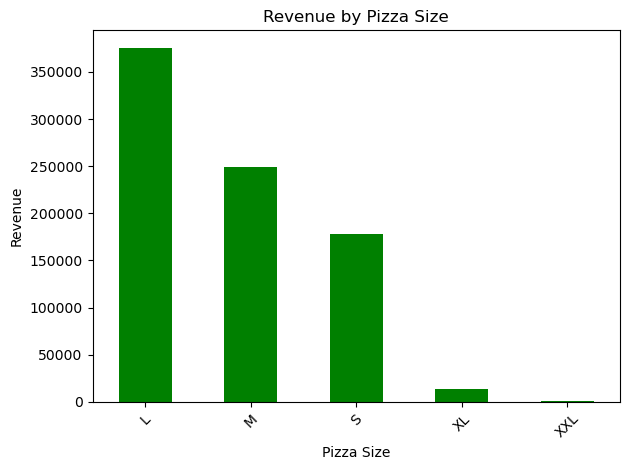

In [22]:
# Revenue by pizza size
size_analysis['revenue_per_size'].plot(kind='bar', color='green')
plt.xlabel('Pizza Size')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Inference:** Classic pizzas generate the highest revenue ($220K) despite being the cheapest ($14.80), indicating they're the most popular category and compensate for lower prices through higher sales volume.

What is the average unit price and revenue of most sold 3 pizzas?

In [24]:
top_pizza_analysis = pizza_df.groupby('pizza_name').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_pizza=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).nlargest(5, 'revenue_per_pizza')
print("Average Unit Price and Revenue of Top 3 Pizzas:\n", top_pizza_analysis)

Average Unit Price and Revenue of Top 3 Pizzas:
                               average_unit_price  revenue_per_pizza
pizza_name                                                         
The Thai Chicken Pizza                 18.286069           43434.25
The Barbecue Chicken Pizza             17.572934           42768.00
The California Chicken Pizza           17.448523           41409.50
The Classic Deluxe Pizza               15.575952           38180.50
The Spicy Italian Pizza                18.104663           34831.25


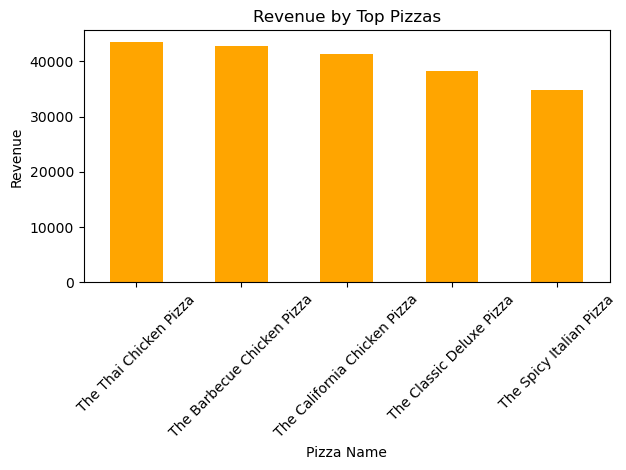

In [25]:
# Revenue by top pizza
top_pizza_analysis['revenue_per_pizza'].plot(kind='bar', color='orange')
plt.xlabel('Pizza Name')
plt.ylabel('Revenue')
plt.title('Revenue by Top Pizzas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Inference:** Chicken pizzas dominate the top revenue performers, with Thai Chicken leading at $43,434 despite premium pricing, while the Classic Deluxe pizza achieves high revenue through volume despite lower pricing.

Which days of the week have the highest number of orders?

In [26]:
pizza_df['day_of_week'] = pd.to_datetime(pizza_df['order_date']).dt.strftime('%A')
day_of_week_analysis = pizza_df.groupby('day_of_week')['order_id'].count().sort_values(ascending=False)
print("Highest Number of Orders by Day of Week:\n", day_of_week_analysis)

Highest Number of Orders by Day of Week:
 day_of_week
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_id, dtype: int64


**Inference:** Fridays see the highest order volume (8,106 orders), followed by weekends, indicating peak demand at the end of the workweek, while Sundays have the lowest orders (5,917), suggesting different customer dining patterns on weekend evenings.

Which season has the highest revenue?

In [27]:
def categorize_season(month):
    if month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
    else:
        return 'Winter'

In [28]:
pizza_df['season'] = pd.to_datetime(pizza_df['order_date']).dt.strftime('%B').map(categorize_season)
seasonal_revenue_analysis = pizza_df.groupby('season')['total_price'].sum()
print("Season with the Highest Revenue:\n", seasonal_revenue_analysis)

Season with the Highest Revenue:
 season
Fall      198603.00
Spring    210536.65
Summer    209066.35
Winter    199654.05
Name: total_price, dtype: float64


**Inference:** Spring generates the highest revenue ($210,537), followed closely by Summer ($209,066), while Fall and Winter show slightly lower but consistent sales, indicating relatively stable year-round demand with mild seasonal peaks during warmer months.

Which pizza size is preferred by customers?

In [29]:
preferred_pizza_size = pizza_df.groupby('pizza_size').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Size:\n", preferred_pizza_size)

Preferred Pizza Size:
             order_count  average_unit_price
pizza_size                                 
L                 18526           19.802553


**Inference:** Large (L) pizzas are the most popular size with 18,526 orders at an average price of $19.80, indicating customers prefer larger portions, likely for sharing or better value per slice.

Which pizza category is preferred by customers?

In [30]:
preferred_pizza_category = pizza_df.groupby('pizza_category').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Category:\n", preferred_pizza_category)

Preferred Pizza Category:
                 order_count  average_unit_price
pizza_category                                 
Classic               14579            14.79749


**Inference:** Classic pizzas are the most ordered category with 14,579 orders at an average price of $14.80, confirming customer preference for traditional, familiar options at accessible price points.

Number of pizzas sold per category

In [31]:
pizzas_per_category = pizza_df['pizza_category'].value_counts()
print("Number of Pizzas per Category:\n", pizzas_per_category)

Number of Pizzas per Category:
 pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64


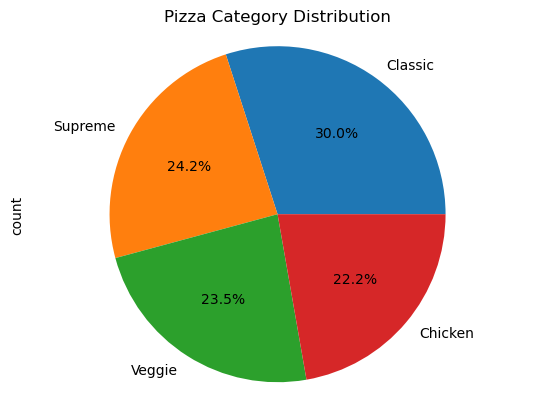

In [32]:
# pizza per category distribution
pizzas_per_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Pizza Category Distribution')
plt.axis('equal')
plt.show()

Number of Pizzas per Category:
 pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815

## Conclusion

This analysis of 48,620 pizza orders from 2015 reveals clear patterns in customer preferences and sales performance. **Classic pizzas emerge as the dominant revenue driver**, generating $220,053 despite lower average prices ($14.80), primarily through high sales volume (14,579 orders). Large pizzas are the preferred size, and **Chicken pizzas command premium pricing** with top individual performers like Thai Chicken and Barbecue Chicken leading in revenue.

**Operationally**, the restaurant experiences peak demand on **Fridays** (8,106 orders) with consistently strong weekday performance, while **Spring season** shows the highest revenue ($210,537). The average order value of $38.31 with 2.3 pizzas per order indicates customers typically purchase for small groups or families.

**Key Recommendations:**
- Focus inventory and staffing resources on Fridays and Spring season to capitalize on peak periods
- Promote premium Chicken pizzas more aggressively given their strong revenue performance
- Consider strategies to boost Sunday sales and Winter revenue, which lag behind other periods
- Leverage the popularity of Classic pizzas while upselling premium options to increase average order value

Overall, the business demonstrates stable year-round performance with clear opportunities for targeted improvements in marketing, pricing strategy, and operational efficiency.